## This notebook solves a simplified version of Huggett (1996) model using Dolo.

This is a heterogeneous-agent overlapping generations model where each period agents are hit with idiosyncratic income shocks $y_t$ that follow an $AR1$ process. Also, each period, agents die with probability $\tau$, and at age $T$, agents die with certainty.  There are incomplete markets and agents only have access to a risk-free asset $s_t$ that pays $(1+r)s_t$ next period, where $r$ is the interest rate.

The value function for an agent with current assets $s$ and current income $y$ is: $v(y,s)=\max_{c,s'} u(c)+\beta \mathbf{E}v(y',s')$ where the expectation is taken over the value of the income shock and the probability of dying.

The agent's budget constraint is: $c+s'=(1+r)s+y$ where s' is his asset choice next period. The agent will also be subject to a borrowing constraint: $s'\geq \bar{s}$.

Here, we define the control in the model as $a=s'-s$, i.e. $a$ is the change in assets.


#### Some notes on the solution method:

The solution method is almost identical to Huggett (1993) except that we have an additional exogenous process, $t$, for keeping track of whether an agent is alive or not (if $t=1$, the agent is alive). $t$ follows a Markov Process. To illustrate, let us suppose an agent can live for three periods at most, and each period he has a probability $\tau$ of dying. Then, the set of values for $t$ is $[1, 1,1,0]$ and the transition matrix for $t$ is:

\begin{bmatrix}
    0     & 1-\tau  & 0 & \tau \\
    0       & 0 & 1-\tau  & \tau \\
    0       & 0  & 0 & 1\\
    0       & 0 & 0 & 1\\
\end{bmatrix}



In [1]:
# importing packages
# First import the packages
Pkg.dir("Dolo")
import Dolo
using AxisArrays
using PyPlot

. To use SymEngine run the following code: `Pkg.add("SymEngine")`


In [56]:
# get the model file
filename=("Huggett1996.yaml")

"Huggett1996.yaml"

In [57]:
model=Dolo.yaml_import(filename)

name,Huggett 1996
filename,Huggett1996.yaml
Type,Equation
value,\[V_{t} = \frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}+\beta V_{t+1}\]
expectation,\[m_{t} = \frac{\beta}{\left(c_{t+1}\right)^{\sigma}} 1+r\]
felicity,\[u_{t} = \frac{\left(c_{t}\right)^{\left(1-\sigma\right)}}{\left(1-\sigma\right)}\]
transition,\[s_{t} = a_{t-1}+s_{t-1}\]
arbitrage,\[\left(1-\beta \left(\frac{c_{t}}{c_{t+1}}\right)^{\sigma} 1+r\right) \left(1-t_{t}\right)+t_{t} \left(10000-c_{t}\right)\]


Model


In [38]:
dp = Dolo.discretize(model.exogenous)

Dolo.DiscreteMarkovProcess(,[0.855625 0.13875 … 0.0 0.0; 0.069375 0.86125 … 0.0 0.0; … ; 0.069375 0.86125 … 0.0 0.0; 0.005625 0.13875 … 0.0 0.0],[-0.0848953 0.0 1.0; 0.0 0.0 1.0; … ; 0.0 8.0 0.0; 0.0848953 8.0 0.0])

Dolo.UnstructuredGrid


In [58]:
@time sol=Dolo.time_iteration(model, verbose=true, maxit=1000)
dr=sol.dr
@time res = Dolo.time_iteration(model, dr; maxit=200)

------------------------------------------------------------------
It    ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
0     NaN             NaN             0.00e+00        0    
1     1.60e+01        NaN             4.97e-01        5    
2     5.44e-02        3.40e-03        1.82e-01        4    
3     4.14e-02        7.60e-01        1.56e-01        4    
4     3.20e-02        7.73e-01        1.48e-01        4    
5     2.49e-02        7.78e-01        1.37e-01        3    
6     1.94e-02        7.80e-01        1.29e-01        3    
7     1.52e-02        7.82e-01        1.24e-01        3    
8     1.19e-02        7.86e-01        1.31e-01        3    
9     9.44e-03        7.91e-01        1.89e-01        3    
10    7.52e-03        7.97e-01        1.58e-01        3    
11    6.04e-03        8.03e-01        1.37e-01        3    
12    5.12e-03        8.47e-01        9.44e-02        2    
13    4.40e-03     

135   7.85e-05        9.80e-01        4.56e-02        1    
136   7.69e-05        9.80e-01        5.71e-02        1    
137   7.53e-05        9.80e-01        4.09e-02        1    
138   7.38e-05        9.80e-01        5.83e-02        1    
139   7.23e-05        9.80e-01        5.56e-02        1    
140   7.08e-05        9.80e-01        5.25e-02        1    
141   6.95e-05        9.80e-01        4.91e-02        1    
142   6.81e-05        9.80e-01        4.95e-02        1    
143   6.68e-05        9.80e-01        6.09e-02        1    
144   6.55e-05        9.80e-01        5.48e-02        1    
145   6.42e-05        9.80e-01        4.30e-02        1    
146   6.29e-05        9.80e-01        5.10e-02        1    
147   6.17e-05        9.80e-01        3.98e-02        1    
148   6.05e-05        9.80e-01        5.82e-02        1    
149   5.93e-05        9.80e-01        6.15e-02        1    
150   5.81e-05        9.80e-01        4.75e-02        1    
151   5.70e-05        9.80e-01        5.

273   4.75e-06        9.79e-01        5.08e-02        1    
274   4.65e-06        9.79e-01        5.22e-02        1    
275   4.56e-06        9.79e-01        5.42e-02        1    
276   4.46e-06        9.79e-01        5.99e-02        1    
277   4.37e-06        9.79e-01        4.32e-02        1    
278   4.28e-06        9.79e-01        4.88e-02        1    
279   4.19e-06        9.79e-01        4.33e-02        1    
280   4.11e-06        9.79e-01        4.32e-02        1    
281   4.02e-06        9.79e-01        5.23e-02        1    
282   3.94e-06        9.79e-01        4.58e-02        1    
283   3.86e-06        9.79e-01        5.70e-02        1    
284   3.78e-06        9.79e-01        4.44e-02        1    
285   3.70e-06        9.79e-01        5.42e-02        1    
286   3.62e-06        9.79e-01        4.45e-02        1    
287   3.55e-06        9.79e-01        5.13e-02        1    
288   3.47e-06        9.79e-01        4.29e-02        1    
289   3.40e-06        9.79e-01        5.

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.DecisionRule{Dolo.UnstructuredGrid,Dolo.CartesianGrid}
 * Number of iterations: 1
 * Convergence: true
   * |x - x'| < 1.0e-07: true


Let's look at some consumption policy functions.

In [61]:
dp.values

27×3 Array{Float64,2}:
 -0.0848953  0.0  1.0
  0.0        0.0  1.0
  0.0848953  0.0  1.0
 -0.0848953  1.0  0.0
  0.0        1.0  0.0
  0.0848953  1.0  0.0
 -0.0848953  2.0  0.0
  0.0        2.0  0.0
  0.0848953  2.0  0.0
 -0.0848953  3.0  0.0
  0.0        3.0  0.0
  0.0848953  3.0  0.0
 -0.0848953  4.0  0.0
  ⋮                  
 -0.0848953  5.0  0.0
  0.0        5.0  0.0
  0.0848953  5.0  0.0
 -0.0848953  6.0  0.0
  0.0        6.0  0.0
  0.0848953  6.0  0.0
 -0.0848953  7.0  0.0
  0.0        7.0  0.0
  0.0848953  7.0  0.0
 -0.0848953  8.0  0.0
  0.0        8.0  0.0
  0.0848953  8.0  0.0

In [66]:

drtab = Dolo.tabulate(model, dr, :s) 

# First we have to get the policy functions 
s0 = model.calibration[:states]
#num_ages= 8 # number of ages  + 1 for death state
#y_states=[num_ages*n-(num_ages-1) for n in 1:5]
#num_yplots=length(y_states)
dr_ylist=[Dolo.tabulate(model, dr, :s, s0,  y) for y in 4:6]
ygrid=dp.values[1:3,1]
r=model.calibration.flat[:r]
#num_yplots=3
#ygrid=
#ygrid=[Dolo.node(model.exogenous,num_ages*i-(num_ages-1))[1] for i in 1:6]
c_ylist=[exp(ygrid[y])+dr_ylist[y][:s]*r-dr_ylist[y][Axis{:V}(:a)] for y in 1:3];

In [7]:
exp(ygrid[2])

1.0

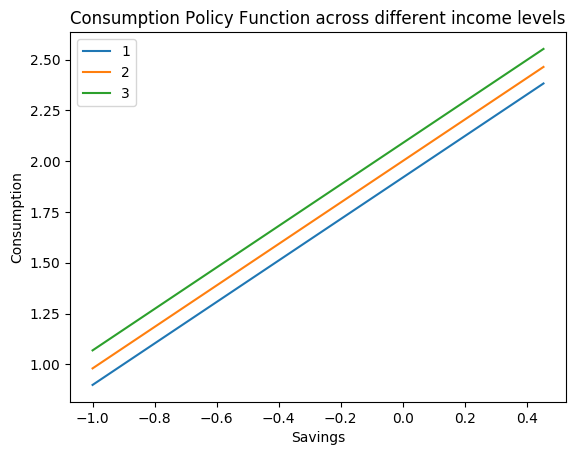

PyObject <matplotlib.text.Text object at 0x000000001B3D7A58>

In [67]:
# Plot the consumption policy function across different income levels for age 1
import PyPlot
plt=PyPlot
end_y=10

for i=1:3
    plt.plot(dr_ylist[i][Axis{:V}(:s)][1:end_y],c_ylist[i][1:end_y], label=i)
end

plt.legend()
plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different income levels")

In [ ]:
# Plot consumption policy function with different ages (income level 2)
inc_level=2
a_states=convert(Vector{Int64},linspace(10,15,6))
num_aplots=length(a_states)
dr_alist=[Dolo.tabulate(model, dr, :s, s0, a) for a in a_states]
c_alist=[exp(ygrid[inc_level])+dr_alist[a][:s]*r-dr_alist[a][Axis{:V}(:a)] for a in 1:num_aplots];

for i=1:num_aplots
    plt.plot(dr_alist[i][Axis{:V}(:s)][1:end_y],c_alist[i][1:end_y], label=i)
end

plt.xlabel("Savings")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function across different Ages")

Simulate the model.

In [ ]:
T=10
hor=linspace(1,T,T)
mc_ar=model.exogenous
sim_armc = Dolo.simulate(model,dr,mc_ar;N=100,T=10);


 Set-up the life-status and earnings path for the agents

In [ ]:
N=100
T=10

life_grid=ones(num_ages)
life_grid[num_ages]=0.0
income_path=zeros(T,N)
life_status=zeros(T,N)
age_status=zeros(T,N)
Tot_states=54.0 #(9 ages * 6 income states)
for j=1:N
    for i=1:T
       state=convert(Int64,sim_armc[Axis{:N}(j), Axis{:V}(:mc_process)][i])
       state_y,state_a=Dolo.node(model.exogenous,state)
       income_path[i,j]=exp(state_y)
       life_status[i,j]=state_a
    end
end

Plot the life-cycle consumption and income profile for one agent.

In [ ]:
# Pick an agent from the simulation: 
import PyPlot
plt=PyPlot
j=9
t_death=maximum(find(life_status[:,j]))
horizon=t_death-2
hor_alive=linspace(1,horizon,horizon)

c=(income_path[1:horizon,j]+sim_armc[Axis{:N}(j), Axis{:V}(:s)][1:horizon]*r-sim_armc[Axis{:N}(j), Axis{:V}(:a)][1:horizon]).*life_status[1:horizon,j]
plt.plot(hor_alive, income_path[1:horizon,j].*life_status[1:horizon,j], color="blue", alpha=0.35, label="income")
plt.plot(hor_alive, c, color="green",label="consumption")
plt.legend()
plt.xlabel("Time Period")
plt.title("Simulated Paths for Consumption and Income")